<a href="https://colab.research.google.com/github/Zalatoelka/wincademy/blob/main/Assignment_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext google.colab.data_table
df = pd.read_csv('https://raw.githubusercontent.com/Zalatoelka/wincademy/main/gdp-per-capita-maddison.csv')
df2= pd.read_csv('https://raw.githubusercontent.com/Zalatoelka/wincademy/main/inequality-gini.csv')

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


**Preparing data**

In [30]:
df.columns.values

array(['Entity', 'Code', 'Year', 'GDP per capita', '417485-annotations'],
      dtype=object)

In [31]:
df = df.drop(columns=['417485-annotations','Code'])  # overbodige kollommen eruit

In [32]:
df.rename(columns={'GDP per capita': 'GDP'}, inplace=True)

In [ ]:
df

In [34]:
df2.columns.values

array(['Entity', 'Code', 'Year', 'Gini coefficient'], dtype=object)

In [35]:
df2 = df2.drop(columns=['Code'])

In [36]:
df2.rename(columns={'Gini coefficient' : 'Gini'}, inplace=True)

In [37]:
df_combined = pd.merge(df,df2, on=['Year','Entity']) # de 2 dataframes samenvoegen

In [ ]:
display (df_combined)

In [39]:
df_new = df_combined[['GDP', 'Gini']].dropna()
df_new.head(5)

,GDP,Gini
0,3965.6853,0.270103
1,5608.9624,0.317390
2,6858.4670,0.305957
3,8522.1300,0.299847
4,9592.0000,0.289605


In [40]:
#Calculate the correlation coefficient

df_new.corr()

,GDP,Gini
GDP,1.000000,-0.432258
Gini,-0.432258,1.000000


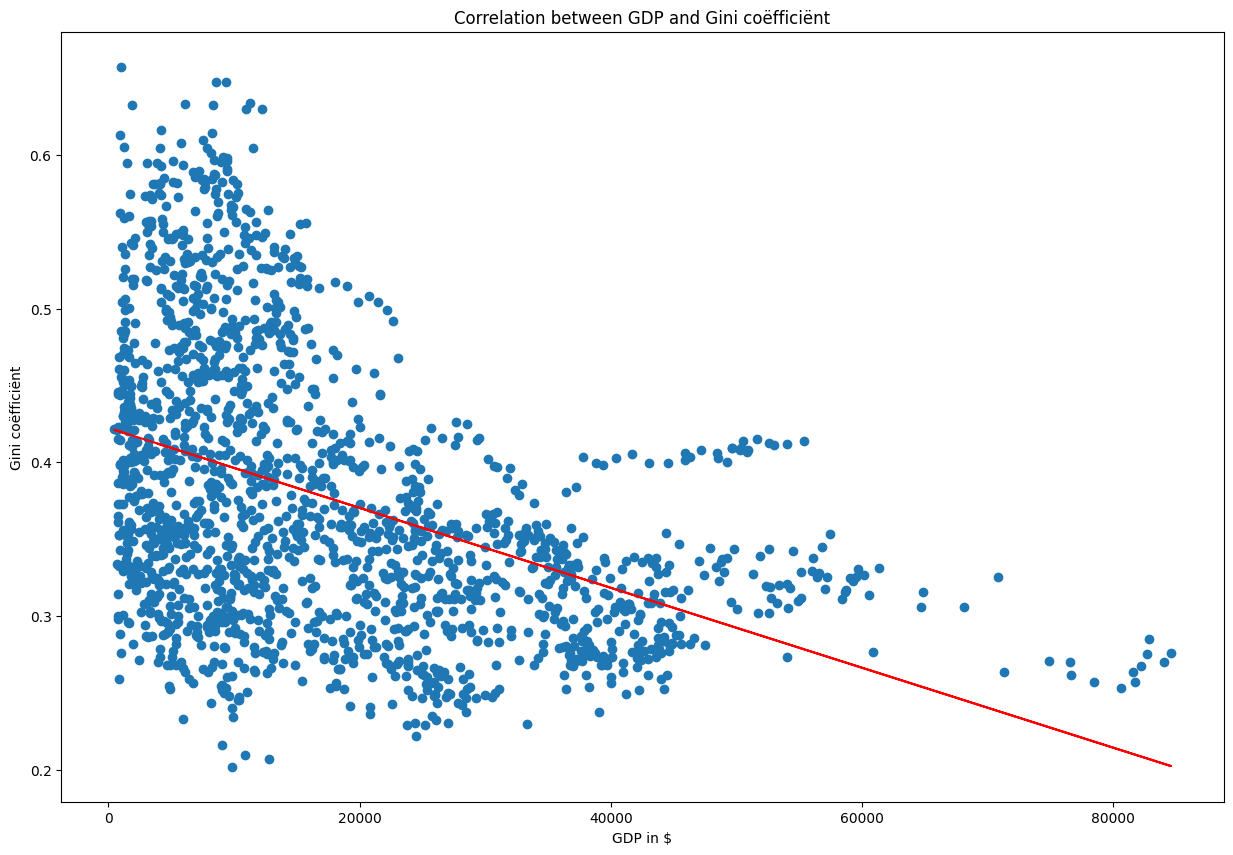

In [47]:
#Ik heb het bovenstaande gevisualiseerd, door gebruik te maken van zowel een scatter plot als een lineaire regressielijn.
#De reden hiervoor is dat de relatie niet overal lineair verloopt.


import numpy.polynomial.polynomial as poly

fig, ax = plt.subplots()

ax.scatter(df_new['GDP'], df_new['Gini'])
# ax.set_ylim(0,1)
ax.set_title('Correlation between GDP and Gini coëfficiënt')
ax.set_xlabel('GDP in $')
ax.set_ylabel('Gini coëfficiënt')
fig.set_size_inches(15,10)

try:
    coefs = poly.polyfit(df_new['GDP'], df_new['Gini'], 1)
    ffit = poly.polyval(df_new['GDP'], coefs)
    plt.plot(df_new['GDP'], ffit, color='red')
except ValueError as error:
    print(f"Could not plot linear regression line because:{error}")

De pearson correlatie coëfficiënt is {pearson_cor[0]}.
Het betreft een negatieve correlatie: bij een stijging van het GDP daalt de  gini coëfficiënt (en dus de inkomensongelijkheid) en vice versa.
Dit wil niet zeggen dat er een causaal verband is!


De p-value is {pearson_cor[1]}. Dit is lager dan 0.05 wat inhoudt dat de correlatie significant is.

**Conclusie:**
Ja, er is een significante relatief sterke negatieve correlatie tussen GDP en inkomensongelijkheid.